# Normal

In [1]:
from models.lag_ml_model import scaling_function,preprocess_data,classifier_models,train_model,grid_optimize_model,random_optimize_model,get_param_grids,get_data

In [2]:
from main import normal_model,grid_model,random_model,backtest_loop,backtest,risk_backtest,risk_backtest_loop

c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\backtesting\_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [3]:
import pandas as pd
pd.set_option('display.max_columns',None)

In [4]:
df = get_data(path=r'C:\Users\sachi\Documents\Researchcode\Conferance_Data\merged_data_META_from_2015-01-01_to_2025-03-01.csv',ind=True)

In [5]:
df

,Date,Close,High,Low,Open,Volume,sentiment_score,shifted_direction,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,EMA_20,BBL_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,OBV,STOCHk_14_3_3,STOCHd_14_3_3
33,2015-02-20,79.900002,80.339996,79.199997,79.550003,36931700,0.209827,1.0,65.554387,0.261766,0.632953,-0.371188,22.462679,29.964676,18.403415,76.661354,73.448343,79.261658,7.613536,1.109807,3.486160e+07,85.418550,69.780737
34,2015-02-23,78.839996,80.190002,78.379997,79.959999,24139100,0.715487,1.0,59.414938,0.390798,0.609588,-0.218791,21.700001,27.431100,20.677892,76.868844,73.366031,79.444969,7.956153,0.900481,1.072250e+07,88.423527,81.090600
35,2015-02-24,78.449997,79.480003,78.099998,78.500000,18897100,-0.440428,1.0,57.289053,0.456327,0.540094,-0.083767,20.731213,25.650349,20.652692,77.019430,73.318394,79.587606,8.200087,0.818540,-8.174600e+06,81.470757,85.104278
36,2015-02-25,79.559998,80.199997,78.500000,78.500000,25593800,0.750931,1.0,61.510229,0.591014,0.539825,0.051189,20.432291,26.911954,18.970837,77.261389,73.247449,80.036550,8.858199,0.929806,1.741920e+07,79.825842,83.240042
37,2015-02-26,80.410004,81.370003,79.720001,79.879997,31111900,0.816998,1.0,64.410878,0.757609,0.565136,0.192473,20.969000,30.049618,17.393164,77.561257,73.088010,80.612990,9.791713,0.973025,4.853110e+07,83.042339,81.446313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,2025-02-21,683.549988,703.869995,682.359985,696.580017,15660400,0.034356,-1.0,50.274815,18.864819,-5.483433,24.348251,45.486132,23.747547,18.738186,692.947688,654.203519,745.170486,13.001094,0.322606,2.675273e+09,28.637454,48.020256
2550,2025-02-24,668.130005,687.270020,662.450012,686.280029,15677000,-0.460232,-1.0,43.996642,14.669344,-7.743126,22.412470,42.707791,21.506298,24.540482,690.584099,659.261189,742.176818,11.832936,0.106962,2.659596e+09,16.571928,30.698227
2551,2025-02-25,657.500000,668.000000,641.859985,665.969971,20579700,0.035601,-1.0,40.263861,10.367142,-9.636262,20.003404,41.160557,19.417451,29.769613,687.433233,658.663081,742.536925,11.971716,-0.013867,2.639016e+09,11.890079,19.033154
2552,2025-02-26,673.700012,683.010010,658.000000,659.650024,14488700,0.151758,-1.0,47.565150,8.170635,-9.466215,17.636851,38.787101,23.052449,27.024652,686.125307,658.551829,742.585177,11.995022,0.180264,2.653505e+09,18.391595,15.617868


In [6]:
X_train,X_test,y_train,y_test = preprocess_data(df,max_lag=10)

In [7]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1757, 31), (754, 31), (1757,), (754,))

In [8]:
X_train.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'sentiment_score', 'RSI_14',
       'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ADX_14', 'DMP_14',
       'DMN_14', 'EMA_20', 'BBL_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0',
       'BBP_20_2.0', 'OBV', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'Close_lag1',
       'Close_lag2', 'Close_lag3', 'Close_lag4', 'Close_lag5', 'Close_lag6',
       'Close_lag7', 'Close_lag8', 'Close_lag9', 'Close_lag10'],
      dtype='object')

In [9]:
X_train_scaled,X_test_scaled = scaling_function(X_train,X_test)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1757, 31), (754, 31), (1757,), (754,))

In [11]:
results,y_pred_dict = normal_model(X_train_scaled,X_test_scaled,y_train,y_test)


Logistic Regression Performance:
Accuracy: 0.8117
Confusion Matrix:
[[172  79]
 [ 63 440]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       251
           1       0.85      0.87      0.86       503

    accuracy                           0.81       754
   macro avg       0.79      0.78      0.78       754
weighted avg       0.81      0.81      0.81       754


Random Forest Performance:
Accuracy: 0.8382
Confusion Matrix:
[[196  55]
 [ 67 436]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       251
           1       0.89      0.87      0.88       503

    accuracy                           0.84       754
   macro avg       0.82      0.82      0.82       754
weighted avg       0.84      0.84      0.84       754


XGBoost Performance:
Accuracy: 0.8382
Confusion Matrix:
[[186  65]
 [ 57 446]]
              precision    recall  f1-score   support

           0       0.77      0.74

c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [12]:
results

,Model,Accuracy,Confusion Matrix
0,Logistic Regression,0.811671,"[[172, 79], [63, 440]]"
1,Random Forest,0.838196,"[[196, 55], [67, 436]]"
2,XGBoost,0.838196,"[[186, 65], [57, 446]]"
3,SVM,0.807692,"[[171, 80], [65, 438]]"
4,Naive Bayes,0.822281,"[[174, 77], [57, 446]]"
5,Gradient Boosting,0.819629,"[[205, 46], [90, 413]]"
6,K-Nearest Neighbors,0.802387,"[[178, 73], [76, 427]]"
7,Decision Tree,0.842175,"[[201, 50], [69, 434]]"
8,AdaBoost,0.855438,"[[202, 49], [60, 443]]"
9,SGD Classifier,0.791777,"[[160, 91], [66, 437]]"


In [13]:
normal_df,bt_collection = backtest_loop(y_pred_dict,X_test)

Backtesting for Logistic Regression


Backtesting for Random Forest


Backtesting for XGBoost


Backtesting for SVM


Backtesting for Naive Bayes


Backtesting for Gradient Boosting


Backtesting for K-Nearest Neighbors


Backtesting for Decision Tree


Backtesting for AdaBoost


Backtesting for SGD Classifier


Backtesting for MLP


Backtesting for LGBMClassifier


In [14]:
normal_df.sort_values(by='Return [%]',ascending=False).iloc[0]['Model']

'SVM'

In [15]:
best = normal_df[normal_df['Model'] == 'SVM']

<Axes: xlabel='Date'>

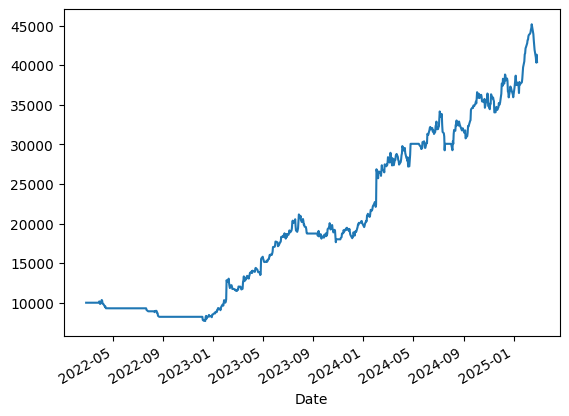

In [16]:
best._equity_curve.iloc[0].Equity.plot()

In [17]:
best._trades.iloc[0]

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,SL,TP,PnL,ReturnPct,EntryTime,ExitTime,Duration,Tag,Entry_get_signal,Exit_get_signal
0,44,22,35,226.070007,210.000000,None,None,-707.080322,-0.071084,2022-03-29,2022-04-18,20 days,None,1,0
1,53,101,103,173.070007,165.940002,None,None,-377.890259,-0.041197,2022-07-22,2022-07-26,4 days,None,1,0
2,49,115,122,179.710007,165.490005,None,None,-696.780060,-0.079127,2022-08-11,2022-08-22,11 days,None,1,0
3,68,196,197,119.910004,113.760002,None,None,-418.200104,-0.051288,2022-12-06,2022-12-07,1 days,None,0,1
4,67,198,201,116.389999,122.129997,None,None,384.579857,0.049317,2022-12-08,2022-12-13,5 days,None,1,1
5,68,202,204,119.389999,120.230003,None,None,57.120270,0.007036,2022-12-14,2022-12-16,2 days,None,1,0
6,70,207,214,116.699997,122.820000,None,None,428.400192,0.052442,2022-12-21,2023-01-03,13 days,None,1,1
7,68,215,248,127.379997,171.070007,None,None,2970.920685,0.342990,2023-01-04,2023-02-22,49 days,None,1,1
8,67,249,252,172.000000,171.899994,None,None,-6.700409,-0.000581,2023-02-23,2023-02-28,5 days,None,1,0
9,65,255,367,178.919998,300.980011,None,None,7933.900833,0.682204,2023-03-03,2023-08-14,164 days,None,1,1


In [18]:
bt_collection['SVM'].plot()

GridPlot(id='p1376', ...)

In [27]:
normal_df

,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],Volatility (Ann.) [%],CAGR [%],Sharpe Ratio,Sortino Ratio,Calmar Ratio,Alpha [%],Beta,Max. Drawdown [%],Avg. Drawdown [%],Max. Drawdown Duration,Avg. Drawdown Duration,# Trades,Win Rate [%],Best Trade [%],Worst Trade [%],Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,Kelly Criterion,_strategy,_equity_curve,_trades,Model
0,2022-02-25,2025-02-27,1098 days,52.122016,39269.737000,43897.106567,292.697370,212.732803,57.959075,51.018298,36.880373,1.136045,3.534097,2.276348,197.751833,0.446314,-25.461427,-4.606419,297 days,26 days,15,53.333333,138.626828,-7.912749,7.334986,221 days,38 days,5.439316,11.308374,1.138369,0.404789,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,Logistic Regression
1,2022-02-25,2025-02-27,1098 days,68.435013,29824.882759,32935.683296,198.248828,212.732803,44.082928,45.715723,28.504907,0.964284,2.684519,1.345262,105.640925,0.435325,-32.769029,-4.928689,304 days,30 days,25,36.000000,151.761155,-9.587675,4.495240,231 days,29 days,4.405110,7.316841,1.363890,0.258485,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,Random Forest
2,2022-02-25,2025-02-27,1098 days,69.761273,33885.073410,37813.091293,238.850734,212.732803,50.362001,48.254163,32.324810,1.043682,3.072211,1.712733,144.279142,0.444556,-29.404465,-4.682015,304 days,29 days,16,56.250000,140.558438,-10.633799,7.954116,262 days,47 days,6.267710,11.759782,1.641099,0.466418,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,XGBoost
3,2022-02-25,2025-02-27,1098 days,51.856764,40405.938744,45190.168297,304.059387,212.732803,59.472060,50.929614,37.779354,1.167730,3.792758,2.315689,212.514538,0.430328,-25.682231,-4.166944,303 days,23 days,16,50.000000,68.220442,-7.912749,7.146781,164 days,35 days,5.459845,9.051279,1.543621,0.410002,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,SVM
4,2022-02-25,2025-02-27,1098 days,66.312997,27182.889633,30398.519333,171.828896,212.732803,39.684816,46.582112,25.798194,0.851933,2.191236,1.112367,71.063500,0.473671,-35.676008,-5.288982,304 days,31 days,21,33.333333,149.822269,-9.587675,4.431852,207 days,33 days,3.663910,7.797843,1.034151,0.215791,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,Naive Bayes
5,2022-02-25,2025-02-27,1098 days,63.660477,29637.350159,31804.118164,196.373502,212.732803,43.779503,44.751829,28.319011,0.978273,2.771817,1.530024,107.785610,0.416428,-28.613603,-4.378708,304 days,30 days,21,42.857143,74.724442,-9.587675,5.322658,146 days,33 days,3.639942,6.997280,1.469028,0.283818,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,Gradient Boosting
6,2022-02-25,2025-02-27,1098 days,69.628647,37489.146706,41448.347389,274.891467,212.732803,55.528249,49.864165,35.430359,1.113590,3.454767,1.628483,179.434653,0.448717,-34.098153,-3.946290,304 days,22 days,25,60.000000,157.622191,-8.791264,5.453877,238 days,30 days,5.232776,8.333122,1.803600,0.481443,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,K-Nearest Neighbors
7,2022-02-25,2025-02-27,1098 days,68.302387,30704.161972,33956.362534,207.041620,212.732803,45.488896,46.342687,29.364693,0.981577,2.767628,1.738751,115.301548,0.431246,-26.161824,-5.297515,304 days,33 days,31,48.387097,145.456059,-10.633799,3.682545,246 days,23 days,4.220767,5.860234,1.262022,0.323160,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,Decision Tree
8,2022-02-25,2025-02-27,1098 days,66.976127,34013.322311,37941.340195,240.133223,212.732803,50.551963,47.767975,32.439586,1.058281,3.129558,2.222885,148.657713,0.430002,-22.741602,-4.546280,298 days,29 days,14,50.000000,136.807260,-9.587675,9.177900,259 days,52 days,7.040305,13.285683,1.573460,0.410302,MyStrategy,E

In [37]:
risk_normal_df,bt_collection = risk_backtest_loop(y_pred_dict,X_test,risk = 0.024)
pd.merge(normal_df[['Return [%]','Model']],risk_normal_df[['Return [%]','Model']],on='Model')

Backtesting for Logistic Regression


Backtesting for Random Forest


Backtesting for XGBoost


Backtesting for SVM


Backtesting for Naive Bayes


Backtesting for Gradient Boosting


Backtesting for K-Nearest Neighbors


Backtesting for Decision Tree


Backtesting for AdaBoost


Backtesting for SGD Classifier


Backtesting for MLP


Backtesting for LGBMClassifier


,Return [%]_x,Model,Return [%]_y
0,292.697370,Logistic Regression,349.092085
1,198.248828,Random Forest,202.241068
2,238.850734,XGBoost,240.908811
3,304.059387,SVM,316.259177
4,171.828896,Naive Bayes,230.418373
5,196.373502,Gradient Boosting,178.951516
6,274.891467,K-Nearest Neighbors,352.146355
7,207.041620,Decision Tree,233.895500
8,240.133223,AdaBoost,258.992945
9,243.079394,SGD Classifier,266.550271


In [20]:
pd.merge(normal_df[['Return [%]','Model']],risk_normal_df[['Return [%]','Model']],on='Model')

,Return [%]_x,Model,Return [%]_y
0,292.697370,Logistic Regression,292.697370
1,198.248828,Random Forest,198.248828
2,238.850734,XGBoost,238.850734
3,304.059387,SVM,304.059387
4,171.828896,Naive Bayes,171.828896
5,196.373502,Gradient Boosting,196.373502
6,274.891467,K-Nearest Neighbors,274.891467
7,207.041620,Decision Tree,207.041620
8,240.133223,AdaBoost,240.133223
9,243.079394,SGD Classifier,243.079394


In [20]:
risk_normal_df

,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],Volatility (Ann.) [%],CAGR [%],Sharpe Ratio,Sortino Ratio,Calmar Ratio,Alpha [%],Beta,Max. Drawdown [%],Avg. Drawdown [%],Max. Drawdown Duration,Avg. Drawdown Duration,# Trades,Win Rate [%],Best Trade [%],Worst Trade [%],Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,Kelly Criterion,_strategy,_equity_curve,_trades,Model
0,2022-02-25,2025-02-27,1098 days,51.591512,38359.688461,42908.628036,283.596885,212.732803,56.726080,50.166520,36.145758,1.130756,3.489579,2.309144,189.962830,0.440149,-24.565845,-4.712978,297 days,27 days,15,46.666667,138.626828,-7.912749,7.178881,221 days,37 days,5.210071,11.164836,1.115687,0.331450,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,Logistic Regression
1,2022-02-25,2025-02-27,1098 days,66.180371,36100.665878,39918.466537,261.006659,212.732803,53.578826,48.275096,34.262371,1.109865,3.383362,2.296523,170.574673,0.425097,-23.330409,-4.160865,298 days,28 days,20,50.000000,100.929727,-9.208768,6.716804,134 days,36 days,5.990076,8.841038,1.805666,0.394669,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,Random Forest
2,2022-02-25,2025-02-27,1098 days,68.965517,33704.523911,37632.541794,237.045239,212.732803,50.093759,47.565450,32.162659,1.053154,3.089268,1.718759,143.618167,0.439176,-29.145303,-4.492796,304 days,28 days,14,50.000000,140.558438,-10.633799,9.216528,262 days,54 days,6.481286,13.508069,1.668646,0.417639,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,XGBoost
3,2022-02-25,2025-02-27,1098 days,50.795756,39513.239487,44140.609055,295.132395,212.732803,58.285756,49.804646,37.074707,1.170288,3.763039,2.392642,205.092300,0.423254,-24.360414,-4.130467,298 days,23 days,16,50.000000,64.586875,-7.526822,7.134755,159 days,34 days,5.473852,8.971795,1.540623,0.409428,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,SVM
4,2022-02-25,2025-02-27,1098 days,65.517241,24498.230278,27400.140007,144.982303,212.732803,34.913570,44.125185,22.831458,0.791239,1.953275,0.979267,47.093689,0.460148,-35.652768,-5.449055,304 days,36 days,21,33.333333,149.822269,-13.797153,3.942861,207 days,33 days,3.221433,7.363288,0.888799,0.191574,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,Naive Bayes
5,2022-02-25,2025-02-27,1098 days,63.129973,27619.111290,29672.802391,176.191113,212.732803,40.430036,43.139713,26.258679,0.937188,2.582173,1.369623,89.470923,0.407648,-29.519090,-4.624601,304 days,33 days,20,40.000000,74.724442,-9.587675,5.279862,146 days,34 days,3.531650,7.033161,1.393003,0.261868,MyStrategy,Equity DrawdownPct DrawdownD...,Size EntryBar ExitBar EntryPrice Exit...,Gradient Boosting
6,2022-02-25,2025-02-27,1098 days,69.230769,37461.695969,41420.896652,274.616960,212.732803,55.490179,49.297170,35.407593,1.125626,3.489528,1.645894,180.197192,0.443842,-33.714312,-3.891503,304 days,22 days,25,60.000000,157.622191,-8.791264,5.480069,238 days,30 days,5.244418,8.356041,1.814193,0.481926,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,K-Nearest Neighbors
7,2022-02-25,2025-02-27,1098 days,66.578249,32541.246178,35934.846764,225.412462,212.732803,48.342118,46.573457,31.101556,1.037976,3.011491,2.020684,136.053481,0.420053,-23.923636,-4.695990,298 days,30 days,29,55.172414,145.456059,-10.259276,4.180633,246 days,24 days,4.561151,6.491949,1.325736,0.375366,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,Decision Tree
8,2022-02-25,2025-02-27,1098 days,66.445623,32379.591690,36153.569656,223.795917,212.732803,48.095419,46.212972,30.951797,1.040734,3.013120,2.116836,133.872612,0.422705,-22.720430,-4.767376,298 days,31 days,14,50.000000,136.807260,-9.587675,8.966781,259 days,52 days,6.942737,13.071081,1.523906,0.407336,MyStrategy,

In [21]:
best.iloc[0]._trades

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,SL,TP,PnL,ReturnPct,EntryTime,ExitTime,Duration,Tag,Entry_get_signal,Exit_get_signal
0,44,22,35,226.070007,210.000000,None,None,-707.080322,-0.071084,2022-03-29,2022-04-18,20 days,None,1,0
1,53,101,103,173.070007,165.940002,None,None,-377.890259,-0.041197,2022-07-22,2022-07-26,4 days,None,1,0
2,49,115,122,179.710007,165.490005,None,None,-696.780060,-0.079127,2022-08-11,2022-08-22,11 days,None,1,0
3,68,196,197,119.910004,113.760002,None,None,-418.200104,-0.051288,2022-12-06,2022-12-07,1 days,None,0,1
4,67,198,201,116.389999,122.129997,None,None,384.579857,0.049317,2022-12-08,2022-12-13,5 days,None,1,1
5,68,202,204,119.389999,120.230003,None,None,57.120270,0.007036,2022-12-14,2022-12-16,2 days,None,1,0
6,70,207,214,116.699997,122.820000,None,None,428.400192,0.052442,2022-12-21,2023-01-03,13 days,None,1,1
7,68,215,248,127.379997,171.070007,None,None,2970.920685,0.342990,2023-01-04,2023-02-22,49 days,None,1,1
8,67,249,252,172.000000,171.899994,None,None,-6.700409,-0.000581,2023-02-23,2023-02-28,5 days,None,1,0
9,65,255,367,178.919998,300.980011,None,None,7933.900833,0.682204,2023-03-03,2023-08-14,164 days,None,1,1


In [22]:
risk_normal_df.iloc[3]._trades

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,SL,TP,PnL,ReturnPct,EntryTime,ExitTime,Duration,Tag,Entry_get_signal,Exit_get_signal
0,44,22,35,226.070007,210.000000,89.435999,None,-707.080322,-0.071084,2022-03-29,2022-04-18,20 days,None,1,0
1,50,101,103,173.070007,165.940002,73.267999,None,-356.500244,-0.041197,2022-07-22,2022-07-26,4 days,None,1,0
2,49,117,122,178.960007,165.490005,72.200000,None,-660.030060,-0.075268,2022-08-15,2022-08-22,7 days,None,1,0
3,67,196,197,119.910004,113.760002,48.972000,None,-412.050102,-0.051288,2022-12-06,2022-12-07,1 days,None,0,1
4,68,199,201,115.300003,122.129997,46.132001,None,464.439606,0.059237,2022-12-09,2022-12-13,4 days,None,1,1
5,69,202,204,119.389999,120.230003,48.060001,None,57.960274,0.007036,2022-12-14,2022-12-16,2 days,None,1,0
6,71,207,214,116.699997,122.820000,46.835999,None,434.520195,0.052442,2022-12-21,2023-01-03,13 days,None,1,1
7,69,216,248,126.129997,171.070007,50.948001,None,3100.860695,0.356299,2023-01-05,2023-02-22,48 days,None,1,1
8,69,249,252,172.000000,171.899994,68.447998,None,-6.900421,-0.000581,2023-02-23,2023-02-28,5 days,None,1,0
9,64,258,367,182.869995,300.980011,73.803998,None,7559.041016,0.645869,2023-03-08,2023-08-14,159 days,None,1,1


<Axes: >

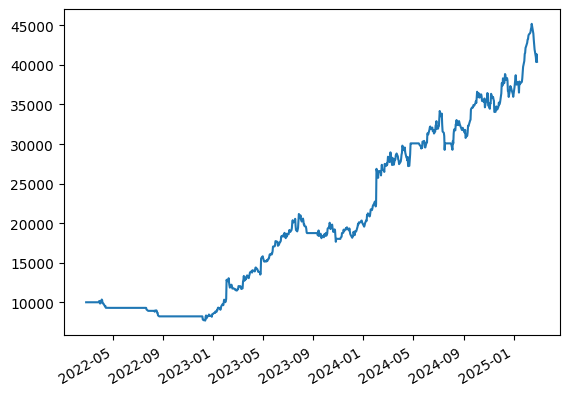

In [26]:
best.iloc[0]._equity_curve.Equity.plot()

In [39]:
pd.set_option('display.max_rows',50)

In [40]:
best.iloc[0]._trades

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,SL,TP,PnL,ReturnPct,EntryTime,ExitTime,Duration,Tag,Entry_get_signal,Exit_get_signal
0,44,22,35,226.070007,210.000000,None,None,-707.080322,-0.071084,2022-03-29,2022-04-18,20 days,None,1,0
1,53,101,103,173.070007,165.940002,None,None,-377.890259,-0.041197,2022-07-22,2022-07-26,4 days,None,1,0
2,49,115,122,179.710007,165.490005,None,None,-696.780060,-0.079127,2022-08-11,2022-08-22,11 days,None,1,0
3,68,196,197,119.910004,113.760002,None,None,-418.200104,-0.051288,2022-12-06,2022-12-07,1 days,None,0,1
4,67,198,201,116.389999,122.129997,None,None,384.579857,0.049317,2022-12-08,2022-12-13,5 days,None,1,1
5,68,202,204,119.389999,120.230003,None,None,57.120270,0.007036,2022-12-14,2022-12-16,2 days,None,1,0
6,70,207,214,116.699997,122.820000,None,None,428.400192,0.052442,2022-12-21,2023-01-03,13 days,None,1,1
7,68,215,248,127.379997,171.070007,None,None,2970.920685,0.342990,2023-01-04,2023-02-22,49 days,None,1,1
8,67,249,252,172.000000,171.899994,None,None,-6.700409,-0.000581,2023-02-23,2023-02-28,5 days,None,1,0
9,65,255,367,178.919998,300.980011,None,None,7933.900833,0.682204,2023-03-03,2023-08-14,164 days,None,1,1


In [41]:
best.iloc[0]._equity_curve

,Equity,DrawdownPct,DrawdownDuration
2022-02-25,10000.000000,0.000000,NaT
2022-02-28,10000.000000,0.000000,NaT
2022-03-01,10000.000000,0.000000,NaT
2022-03-02,10000.000000,0.000000,NaT
2022-03-03,10000.000000,0.000000,NaT
...,...,...,...
2025-02-21,41949.848595,0.071704,NaT
2025-02-24,41009.229637,0.092519,NaT
2025-02-25,40360.799339,0.106868,NaT
2025-02-26,41349.000084,0.085000,NaT


<Axes: >

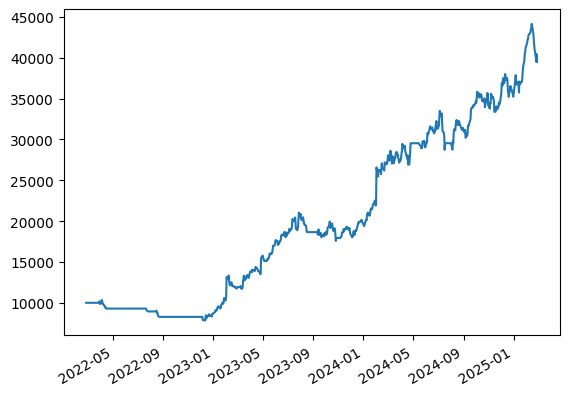

In [27]:
risk_normal_df.iloc[3]._equity_curve.Equity.plot()

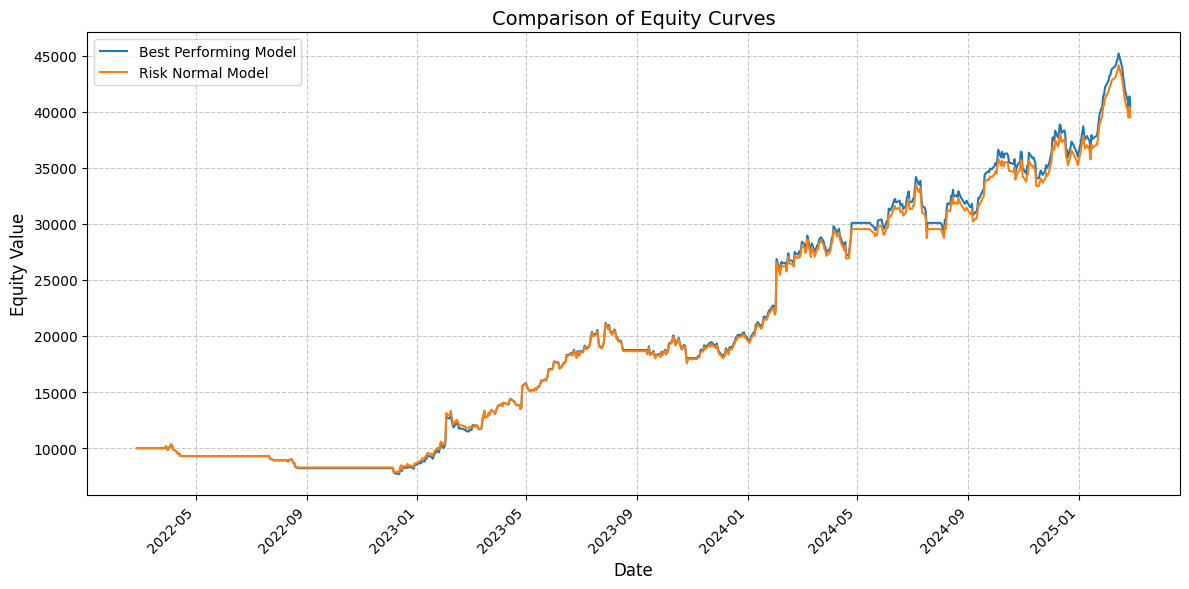

In [28]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot both equity curves
best.iloc[0]._equity_curve.Equity.plot(label='Best Performing Model')
risk_normal_df.iloc[3]._equity_curve.Equity.plot(label='Risk Normal Model')

# Customize the plot
plt.title('Comparison of Equity Curves', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Equity Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


In [39]:
bt_collection

{'Logistic Regression': <backtesting.backtesting.Backtest at 0x267d2d5dba0>,
 'Random Forest': <backtesting.backtesting.Backtest at 0x267d2d5cf40>,
 'XGBoost': <backtesting.backtesting.Backtest at 0x267d2d9f4f0>,
 'SVM': <backtesting.backtesting.Backtest at 0x267d2e178b0>,
 'Naive Bayes': <backtesting.backtesting.Backtest at 0x267d2e33bb0>,
 'Gradient Boosting': <backtesting.backtesting.Backtest at 0x267d2e496f0>,
 'K-Nearest Neighbors': <backtesting.backtesting.Backtest at 0x267d2e87c70>,
 'Decision Tree': <backtesting.backtesting.Backtest at 0x267d2ebbf10>,
 'AdaBoost': <backtesting.backtesting.Backtest at 0x267d2ebabc0>,
 'SGD Classifier': <backtesting.backtesting.Backtest at 0x267d2ef7bb0>,
 'MLP': <backtesting.backtesting.Backtest at 0x267d2f16350>,
 'LGBMClassifier': <backtesting.backtesting.Backtest at 0x267d2f2ae00>}

In [41]:
bt_collection['XGBoost'].plot()

GridPlot(id='p2184', ...)

In [ ]:
normal_df.loc[7]

Start                                                   2022-02-25 00:00:00
End                                                     2025-02-27 00:00:00
Duration                                                 1098 days 00:00:00
Exposure Time [%]                                                 65.517241
Equity Final [$]                                                 15339.1604
Equity Peak [$]                                                16079.549927
Return [%]                                                        53.391604
Buy & Hold Return [%]                                              33.64934
Return (Ann.) [%]                                                 15.371395
Volatility (Ann.) [%]                                             11.589112
CAGR [%]                                                          10.317138
Sharpe Ratio                                                       1.326365
Sortino Ratio                                                      2.389315
Calmar Ratio

In [ ]:
risk_normal_df._equity_curve[1]

,Equity,DrawdownPct,DrawdownDuration
Date,,,
2022-02-25,10000.000000,0.000000,NaT
2022-02-28,10000.000000,0.000000,NaT
2022-03-01,10000.000000,0.000000,NaT
2022-03-02,10000.000000,0.000000,NaT
2022-03-03,10000.000000,0.000000,NaT
...,...,...,...
2025-02-21,12430.496948,0.049978,NaT
2025-02-24,12375.897339,0.054151,NaT
2025-02-25,12316.496704,0.058690,NaT


In [ ]:
pd.merge(normal_df[['Return [%]','Model']],risk_normal_df[['Return [%]','Model']],on='Model')

,Return [%]_x,Model,Return [%]_y
0,22.012105,Logistic Regression,29.900396
1,19.991688,Random Forest,23.502968
2,47.595801,XGBoost,47.572001
3,22.016990,SVM,26.815200
4,20.744195,Naive Bayes,24.033875
5,29.871574,Gradient Boosting,28.592991
6,18.010182,K-Nearest Neighbors,17.848984
7,53.391604,Decision Tree,50.608787
8,26.195694,AdaBoost,25.866997
9,18.024504,SGD Classifier,19.661149


In [ ]:
pd.merge(normal_df[['Return [%]','Model']],risk_normal_df[['Return [%]','Model']],on='Model')

,Return [%]_x,Model,Return [%]_y
0,22.012105,Logistic Regression,24.390110
1,29.836592,Random Forest,29.705491
2,47.595801,XGBoost,47.572001
3,22.016990,SVM,23.918493
4,20.744195,Naive Bayes,19.415795
5,34.122888,Gradient Boosting,33.938999
6,18.010182,K-Nearest Neighbors,17.312181
7,27.827468,Decision Tree,29.756067
8,26.195694,AdaBoost,25.866997
9,30.835509,SGD Classifier,32.937810


In [ ]:
pd.merge(normal_df[['Return [%]','Model']],risk_normal_df[['Return [%]','Model']],on='Model')

,Return [%]_x,Model,Return [%]_y
0,17.098015,Logistic Regression,18.104215
1,26.822399,Random Forest,30.274599
2,47.257183,XGBoost,47.990588
3,18.888224,SVM,18.128817
4,22.287202,Naive Bayes,23.120800
5,35.211869,Gradient Boosting,34.816068
6,34.991374,K-Nearest Neighbors,35.004372
7,49.105667,Decision Tree,51.895077
8,27.898287,AdaBoost,27.907787
9,12.653558,SGD Classifier,11.761159


In [ ]:
from backtesting import Backtest, Strategy

def risk_backtest(y_pred, X_test, risk=0.20):
    def get_signal():
        return y_pred

    class MyStrategy(Strategy):
        # Risk settings:
        RISK_PER_TRADE = 1  # This will now be the percentage of equity to invest
        STOP_LOSS_PCT = risk  # 20% stop-loss from entry price

        def init(self):
            self.signal = self.I(get_signal)

        def next(self):
            price = self.data.Close[-1]
            current_equity = self.equity
            
            if self.signal[-1] == 1:
                if not self.position:
                    # Calculate shares based on risk percentage of total equity
                    investment_amount = current_equity * self.RISK_PER_TRADE
                    shares = int(investment_amount / price)
                    stop_loss = price * (1 - self.STOP_LOSS_PCT)

                    # Place a buy order with a protective stop-loss at 20% below entry
                    self.buy(size=shares, sl=stop_loss)
            else:
                # If signal == 0 and we have an open position, close it
                if self.position:
                    self.position.close()

    bt = Backtest(X_test, MyStrategy, cash=10000)
    stats = bt.run()
    return stats, bt

def risk_backtest_loop(y_pred_dict,X_test,risk = 0.20):
    stats_l=[]
    bt_collection = {}
    for name,y_pred in y_pred_dict.items():
        print(f"Backtesting for {name}")
        stats,bt = risk_backtest(y_pred,X_test,risk = risk)
        bt_collection[name] = bt
        stats['Model'] = name
        stats_l.append(stats)

    normal_df = pd.DataFrame(stats_l)

    return normal_df,bt_collection


In [ ]:
from backtesting import Backtest, Strategy

def risk_backtest(y_pred, X_test, risk=0.20):
    def get_signal():
        return y_pred

    class MyStrategy(Strategy):
        # Risk settings:
        RISK_PER_TRADE = 1  # This will now be the percentage of equity to invest
        STOP_LOSS_PCT = risk  # 20% stop-loss from entry price

        def init(self):
            self.signal = self.I(get_signal)

        def next(self):
            price = self.data.Close[-1]
            current_equity = self.equity
            
            if self.signal[-1] == 1:
                if not self.position:
                    # Calculate shares based on risk percentage of total equity
                    investment_amount = current_equity * self.RISK_PER_TRADE
                    shares = int(investment_amount / price)
                    stop_loss = price * (1 - self.STOP_LOSS_PCT)

                    # Place a buy order with a protective stop-loss at 20% below entry
                    self.buy(size=shares, sl=stop_loss)
            else:
                # If signal == 0 and we have an open position, close it
                if self.position:
                    self.position.close()

    bt = Backtest(X_test, MyStrategy, cash=10000)
    stats = bt.run()
    return stats, bt

In [ ]:
risk_backtest(y_pred_dict['Decision Tree'],X_test, risk=0.30)

(Start                     2022-03-18 00:00:00
 End                       2025-02-27 00:00:00
 Duration                   1077 days 00:00:00
 Exposure Time [%]                      64.682
 Equity Final [$]                  14873.71637
 Equity Peak [$]                   15299.37756
 Return [%]                           48.73716
 Buy & Hold Return [%]                31.61388
 Return (Ann.) [%]                    14.49731
 Volatility (Ann.) [%]                11.98309
 CAGR [%]                              9.73452
 Sharpe Ratio                          1.20981
 Sortino Ratio                         2.20297
 Calmar Ratio                          1.85417
 Alpha [%]                            36.72962
 Beta                                  0.37982
 Max. Drawdown [%]                    -7.81874
 Avg. Drawdown [%]                    -1.45344
 Max. Drawdown Duration      349 days 00:00:00
 Avg. Drawdown Duration       23 days 00:00:00
 # Trades                                   46
 Win Rate [%]

In [ ]:
stats,_ = backtest(y_test,X_test)

In [ ]:
stats = pd.DataFrame(stats).T
stats['Model'] = 'Actual'

In [ ]:
stats

,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],Volatility (Ann.) [%],CAGR [%],Sharpe Ratio,Sortino Ratio,Calmar Ratio,Alpha [%],Beta,Max. Drawdown [%],Avg. Drawdown [%],Max. Drawdown Duration,Avg. Drawdown Duration,# Trades,Win Rate [%],Best Trade [%],Worst Trade [%],Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,Kelly Criterion,_strategy,_equity_curve,_trades,Model
0,2022-03-18 00:00:00,2025-02-27 00:00:00,1077 days 00:00:00,67.388363,15527.199982,15937.479156,55.272,31.613876,16.188467,12.23875,10.844105,1.322722,2.456555,2.698736,42.709006,0.397389,-5.998536,-1.441498,191 days 00:00:00,20 days 00:00:00,11,63.636364,20.579964,-3.072234,4.145516,162 days 00:00:00,65 days 00:00:00,8.961033,4.339341,2.193246,0.567772,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,Actual


In [ ]:
pd.concat([normal_df,stats],axis=0)

,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],Volatility (Ann.) [%],CAGR [%],Sharpe Ratio,Sortino Ratio,Calmar Ratio,Alpha [%],Beta,Max. Drawdown [%],Avg. Drawdown [%],Max. Drawdown Duration,Avg. Drawdown Duration,# Trades,Win Rate [%],Best Trade [%],Worst Trade [%],Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,Kelly Criterion,_strategy,_equity_curve,_trades,Model
0,2022-03-18 00:00:00,2025-02-27 00:00:00,1077 days 00:00:00,66.847091,11709.801483,12435.331635,17.098015,31.613876,5.529889,12.510375,3.762265,0.442024,0.674964,0.331741,1.344813,0.4983,-16.669293,-2.03446,443 days 00:00:00,34 days 00:00:00,20,40.0,10.876293,-11.878584,0.983801,126 days 00:00:00,35 days 00:00:00,1.871018,1.107855,0.951841,0.18269,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,Logistic Regression
1,2022-03-18 00:00:00,2025-02-27 00:00:00,1077 days 00:00:00,69.282815,12392.018524,12996.818268,23.920185,31.613876,7.587438,12.366643,5.146225,0.613541,0.979476,0.802296,9.107568,0.468548,-9.457161,-2.098744,246 days 00:00:00,30 days 00:00:00,27,62.962963,7.352972,-4.887157,0.892638,85 days 00:00:00,27 days 00:00:00,2.399381,0.930067,1.779614,0.372687,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,Random Forest
2,2022-03-18 00:00:00,2025-02-27 00:00:00,1077 days 00:00:00,70.230041,14725.718292,15445.717987,47.257183,31.613876,14.107531,12.841259,9.478059,1.09861,1.90202,1.553052,33.2715,0.442391,-9.083749,-1.647087,170 days 00:00:00,22 days 00:00:00,27,66.666667,9.629557,-4.098811,1.531281,87 days 00:00:00,27 days 00:00:00,4.743463,1.585123,2.548923,0.538695,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,XGBoost
3,2022-03-18 00:00:00,2025-02-27 00:00:00,1077 days 00:00:00,69.959405,11888.822449,13086.261353,18.888224,31.613876,6.077297,12.721103,4.131286,0.477734,0.739101,0.389399,2.951967,0.504091,-15.606875,-2.072142,310 days 00:00:00,31 days 00:00:00,25,52.0,8.884654,-10.436167,0.786866,79 days 00:00:00,29 days 00:00:00,1.831801,0.866502,1.039503,0.229695,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,SVM
4,2022-03-18 00:00:00,2025-02-27 00:00:00,1077 days 00:00:00,56.427605,12228.720154,12855.369141,22.287202,31.613876,7.101867,9.487132,4.820372,0.748579,1.168178,0.58793,13.623062,0.274061,-12.079439,-1.604886,490 days 00:00:00,34 days 00:00:00,32,56.25,7.610176,-4.785465,0.647305,59 days 00:00:00,18 days 00:00:00,2.220659,0.680245,1.456965,0.307107,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,Naive Bayes
5,2022-03-18 00:00:00,2025-02-27 00:00:00,1077 days 00:00:00,45.331529,13316.840027,13930.200134,33.1684,31.613876,10.260757,12.1267,6.932027,0.846129,1.417624,1.018591,19.665261,0.427127,-10.073485,-1.903949,421 days 00:00:00,26 days 00:00:00,22,59.090909,10.083252,-4.091032,1.086559,131 days 00:00:00,21 days 00:00:00,2.57249,1.140424,1.569365,0.36604,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,Gradient Boosting
6,2022-03-18 00:00:00,2025-02-27 00:00:00,1077 days 00:00:00,66.441137,13499.13739,14251.177429,34.991374,31.613876,10.773156,12.558759,7.272754,0.85782,1.420085,1.152085,20.876914,0.446464,-9.351009,-2.161563,141 days 00:00:00,30 days 00:00:00,27,59.259259,10.701142,-4.516816,1.143754,87 days 00:00:00,26 days 00:00:00,2.451399,1.205011,1.712131,0.341844,MyStrategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,K-Nearest Neighbors
7,2022-03-18 00:00:00,2025-02-27 00:00:00,1077 days 00:00:00,50.473613,13264.147949,13556.967896,32.641479,31.613876,10.111791,10.936493,6.832876,0.924592,1.609816,0.944316,21.871391,0.340676,-10.708064,-1.881982,378 days 00:00:00,36 days 00:00:00,59,67.79661,8.055104,-6.104044,0.489017,52 days 00:00:00,8 days 00:00:00,2.320303,0.507686,2.017085,0.38177,MySt

In [ ]:
y_pred_dict['XGBoost']

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from backtesting import Backtest,Strategy

In [ ]:
def get_signal():
    return y_pred_dict['XGBoost']

get_signal()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_pred_dict.keys()

dict_keys(['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'Naive Bayes', 'Gradient Boosting', 'K-Nearest Neighbors', 'Decision Tree', 'AdaBoost', 'SGD Classifier', 'MLP', 'LGBMClassifier'])

In [ ]:
def get_signal():
    return y_pred_dict['SVM']

class MyStrategy(Strategy):
    def init(self):
        self.signal = self.I(get_signal)

    def next(self):
        if self.signal[-1] == 1:
            if not self.position:
                self.buy()
        elif self.signal[-1] == 0:
            if self.position:
                self.position.close()

bt = Backtest(X_test,MyStrategy,cash=10000)
bt.run()        

Start                     2022-03-18 00:00:00
End                       2025-02-27 00:00:00
Duration                   1077 days 00:00:00
Exposure Time [%]                     69.9594
Equity Final [$]                  11888.82245
Equity Peak [$]                   13086.26135
Return [%]                           18.88822
Buy & Hold Return [%]                31.61388
Return (Ann.) [%]                      6.0773
Volatility (Ann.) [%]                 12.7211
CAGR [%]                              4.13129
Sharpe Ratio                          0.47773
Sortino Ratio                          0.7391
Calmar Ratio                           0.3894
Alpha [%]                             2.95197
Beta                                  0.50409
Max. Drawdown [%]                   -15.60688
Avg. Drawdown [%]                    -2.07214
Max. Drawdown Duration      310 days 00:00:00
Avg. Drawdown Duration       31 days 00:00:00
# Trades                                   25
Win Rate [%]                      

In [ ]:
def get_signal():
    return y_pred_dict['SVM']

class MyStrategy(Strategy):
    # Risk settings:
    RISK_PER_TRADE = 0.02   # 2% risk per trade
    STOP_LOSS_PCT  = 0.05   # 5% stop-loss from entry price

    def init(self):
        self.signal = self.I(get_signal)

    def next(self):
        price = self.data.Close[-1]
        current_equity = self.equity
        # Determine how many shares we can buy so that, if stopped out 5% below entry,
        # we lose no more than 2% of current equity.
        # Risk in dollars = current_equity * RISK_PER_TRADE
        # Stop-loss distance = price * STOP_LOSS_PCT
        # => position_size = (Risk in dollars) / (Stop-loss distance)
        if self.signal[-1] == 1:
            if not self.position:
                risk_dollars = current_equity * self.RISK_PER_TRADE
                stop_dist    = price * self.STOP_LOSS_PCT
                shares       = risk_dollars / stop_dist if stop_dist > 0 else 0

                # Optional rounding to get whole shares:
                shares = int(shares)

                # Place a buy order with a protective stop-loss
                self.buy(size=shares, sl=price * (1 - self.STOP_LOSS_PCT))
        else:
            # If signal == 0 and we have an open position, close it
            if self.position:
                self.position.close()

bt = Backtest(X_test, MyStrategy, cash=10000)
stats = bt.run()
print(stats)

Start                     2022-03-18 00:00:00
End                       2025-02-27 00:00:00
Duration                   1077 days 00:00:00
Exposure Time [%]                    69.82409
Equity Final [$]                   10909.8553
Equity Peak [$]                   11319.84493
Return [%]                            9.09855
Buy & Hold Return [%]                31.61388
Return (Ann.) [%]                     3.01402
Volatility (Ann.) [%]                 4.77037
CAGR [%]                              2.05846
Sharpe Ratio                          0.63182
Sortino Ratio                          0.9694
Calmar Ratio                          0.62236
Alpha [%]                             2.99634
Beta                                  0.19302
Max. Drawdown [%]                    -4.84287
Avg. Drawdown [%]                    -0.85318
Max. Drawdown Duration      136 days 00:00:00
Avg. Drawdown Duration       27 days 00:00:00
# Trades                                   26
Win Rate [%]                      

In [ ]:


def get_signal():
    return y_pred_dict['SVM']

class MyStrategy(Strategy):
    # Modified risk settings:
    RISK_PER_TRADE = 0.02   # Keeping 2% risk per trade
    STOP_LOSS_PCT  = 0.20   # Changed to 20% stop-loss from entry price

    def init(self):
        self.signal = self.I(get_signal)

    def next(self):
        price = self.data.Close[-1]
        current_equity = self.equity
        
        if self.signal[-1] == 1:
            if not self.position:
                risk_dollars = current_equity * self.RISK_PER_TRADE
                stop_dist    = price * self.STOP_LOSS_PCT
                shares       = risk_dollars / stop_dist if stop_dist > 0 else 0

                # Optional rounding to get whole shares:
                shares = int(shares)

                # Place a buy order with a protective stop-loss
                self.buy(size=shares, sl=price * (1 - self.STOP_LOSS_PCT))
        else:
            # If signal == 0 and we have an open position, close it
            if self.position:
                self.position.close()

bt = Backtest(X_test, MyStrategy, cash=10000)
stats = bt.run()
print(stats)

Start                     2022-03-18 00:00:00
End                       2025-02-27 00:00:00
Duration                   1077 days 00:00:00
Exposure Time [%]                     69.9594
Equity Final [$]                  10154.07019
Equity Peak [$]                   10212.64014
Return [%]                             1.5407
Buy & Hold Return [%]                31.61388
Return (Ann.) [%]                     0.52274
Volatility (Ann.) [%]                 0.97308
CAGR [%]                              0.35839
Sharpe Ratio                           0.5372
Sortino Ratio                          0.7878
Calmar Ratio                          0.37074
Alpha [%]                              0.2608
Beta                                  0.04049
Max. Drawdown [%]                    -1.40997
Avg. Drawdown [%]                    -0.16665
Max. Drawdown Duration      443 days 00:00:00
Avg. Drawdown Duration       33 days 00:00:00
# Trades                                   25
Win Rate [%]                      

# Random

In [ ]:
rand_results,y_pred_dict_rand = random_model(X_train_scaled=X_train_scaled, X_test_scaled=X_test_scaled,y_train=y_train,y_test=y_test)

Working on optimizing with RandomSearchCV
Optimizing Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l1', 'C': 0.1}
Optimizing Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': None}
Optimizing XGBoost...
No hyperparameters to tune for XGBoost
Optimizing SVM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for SVM: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
Optimizing Naive Bayes...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for Naive Bayes: {'alpha': 0.1}
Optimizing Gradient Boosting...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Gradient Boosting: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.05}
Optimizing K-Nearest Neighbors...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for K-Nearest Neighbors: {'weights': 'distance', 'p': 2, 'n_neighbors': 7, 'algorithm': 'kd_tree'}
Optimizing Decision Tree...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Decision Tree: {'min_samples_split': 10, 'max_features': None, 'max_depth': 5, 'criterion': 'entropy'}
Optimizing AdaBoost...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for AdaBoost: {'n_estimators': 50, 'learning_rate': 0.1}
Optimizing SGD Classifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\linear_model\_stochast

Best parameters for SGD Classifier: {'penalty': 'l2', 'loss': 'log_loss', 'learning_rate': 'optimal', 'alpha': 0.001}
Optimizing MLP...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for MLP: {'solver': 'sgd', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'tanh'}
Optimizing LGBMClassifier...
[LightGBM] [Info] Number of positive: 1095, number of negative: 627
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20655
[LightGBM] [Info] Number of data points in the train set: 1722, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635889 -> initscore=0.557563
[LightGBM] [Info] Start training from score 0.557563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
rand_results

,Model,Accuracy,Confusion Matrix
0,Logistic Regression,0.875507,"[[290, 55], [37, 357]]"
1,Random Forest,0.826793,"[[227, 118], [10, 384]]"
2,XGBoost,0.887686,"[[289, 56], [27, 367]]"
3,SVM,0.876861,"[[284, 61], [30, 364]]"
4,Naive Bayes,0.849797,"[[247, 98], [13, 381]]"
5,Gradient Boosting,0.884980,"[[292, 53], [32, 362]]"
6,K-Nearest Neighbors,0.857916,"[[264, 81], [24, 370]]"
7,Decision Tree,0.868742,"[[292, 53], [44, 350]]"
8,AdaBoost,0.882273,"[[298, 47], [40, 354]]"
9,SGD Classifier,0.893099,"[[299, 46], [33, 361]]"


In [ ]:
random_optimize_model()

In [ ]:
random_df,bt_collection = backtest_loop(y_pred_dict_rand,X_test)

Backtesting for Logistic Regression


Backtesting for Random Forest


Backtesting for XGBoost


Backtesting for SVM


Backtesting for Naive Bayes


Backtesting for Gradient Boosting


Backtesting for K-Nearest Neighbors


Backtesting for Decision Tree


Backtesting for AdaBoost


Backtesting for SGD Classifier


Backtesting for MLP


Backtesting for LGBMClassifier


In [ ]:
pd.concat([random_df,normal_df,stats],axis=0,keys=['Random','Normal','Actual']).sort_values(by='Return [%]',ascending=False)

Start                  End            Duration  \
Actual 0   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
Random 1   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
       5   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
Normal 9   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
       0   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
       11  2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
Random 11  2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
       4   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
Normal 4   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
       6   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
Random 10  2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
       7   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
Normal 10  2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
Random 6   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
Normal 5   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
       3   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
       1   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
       7   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
       2   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
Random 2   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
Normal 8   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
Random 9   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
       3   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
       0   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   
       8   2022-03-18 00:00:00  2025-02-27 00:00:00  1077 days 00:00:00   

          Exposure Time [%] Equity Final [$] Equity Peak [$] Return [%]  \
Actual 0          51.962111     17565.242096    18567.572235  75.652421   
Random 1          68.606225     14386.921524    15110.780411  43.869215   
       5          57.780785     13325.667465    14151.458801  33.256675   
Normal 9          64.140731     13318.750397    14616.060608  33.187504   
       0          62.516915     13207.580185    14186.071014  32.075802   
       11         59.269283     13056.729919    14570.940155  30.567299   
Random 11         59.269283     13056.729919    14570.940155  30.567299   
       4          65.899865     12858.899521     15330.73909  28.588995   
Normal 4          65.899865     12858.899521     15330.73909  28.588995   
       6          61.705007     12629.009506    13708.208969  26.290095   
Random 10         65.493911     12310.279388    14322.878189  23.102794   
       7          56.833559     12067.851608    13915.790359  20.678516   
Normal 10         54.262517     11944.571487    14206.991501  19.445715   
Random 6          62.787551     11891.309418    14608.229004  18.913094   
Normal 5          60.487145     11865.396271    14646.997223  18.653963   
       3          60.216509     11828.309921     13795.96019  18.283099   
       1          64.682003     11692.869415    12558.320175  16.928694   
       7          53.856563     11628.970322    13205.791046  16.289703   
       2          59.539919     11544.361633    13230.371307  15.443616   
Random 2          59.539919     11544.361633    13230.371307  15.443616   
Normal 8          56.156969     11515.740311     13894.90979  15.157403   
Random 9          56.292287     11344.151047    12756.790726   13.44151   
       3          58.728011     10734.139923    12823.980484   7.341399   
       0          57.104195     10727.600891    12394.001099   7.276009   
       8          56.156969     10568.612335    12974.912125   5.686123   

          Buy & Hold Return [%] Return (Ann.) [%] Volatility (Ann.) [%]  \
Actual 0              44.712775         21.17900

In [ ]:
from main import normal_run

In [ ]:
ticker_df = normal_run(lag=5)

Working on merged_data_AAPL_from_2015-01-01_to_2025-03-01.csv
Loading Data for AAPL, testing on number of lag 5, saving path is strategy_5

Logistic Regression Performance:
Accuracy: 0.8596
Confusion Matrix:
[[270  91]
 [ 15 379]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       361
           1       0.81      0.96      0.88       394

    accuracy                           0.86       755
   macro avg       0.88      0.85      0.86       755
weighted avg       0.87      0.86      0.86       755


Random Forest Performance:
Accuracy: 0.8384
Confusion Matrix:
[[252 109]
 [ 13 381]]
              precision    recall  f1-score   support

           0       0.95      0.70      0.81       361
           1       0.78      0.97      0.86       394

    accuracy                           0.84       755
   macro avg       0.86      0.83      0.83       755
weighted avg       0.86      0.84      0.83       755


XGBoost Performance:
Accurac

c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



LGBMClassifier Performance:
Accuracy: 0.8980
Confusion Matrix:
[[303  58]
 [ 19 375]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       361
           1       0.87      0.95      0.91       394

    accuracy                           0.90       755
   macro avg       0.90      0.90      0.90       755
weighted avg       0.90      0.90      0.90       755

Backtesting for Logistic Regression


Backtesting for Random Forest


Backtesting for XGBoost


Backtesting for SVM


Backtesting for Naive Bayes


Backtesting for Gradient Boosting


Backtesting for K-Nearest Neighbors


Backtesting for Decision Tree


Backtesting for AdaBoost


Backtesting for SGD Classifier


Backtesting for MLP


Backtesting for LGBMClassifier


Saving Backtesting Result
Normal Results and Returns Saved
Working on merged_data_AMD_from_2015-01-01_to_2025-03-01.csv
Loading Data for AMD, testing on number of lag 5, saving path is strategy_5

Logistic Regression Performance:
Accuracy: 0.8702
Confusion Matrix:
[[384  39]
 [ 59 273]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       423
           1       0.88      0.82      0.85       332

    accuracy                           0.87       755
   macro avg       0.87      0.87      0.87       755
weighted avg       0.87      0.87      0.87       755


Random Forest Performance:
Accuracy: 0.8371
Confusion Matrix:
[[389  34]
 [ 89 243]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       423
           1       0.88      0.73      0.80       332

    accuracy                           0.84       755
   macro avg       0.85      0.83      0.83       755
weighted avg       0.84    

c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



MLP Performance:
Accuracy: 0.8477
Confusion Matrix:
[[362  61]
 [ 54 278]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       423
           1       0.82      0.84      0.83       332

    accuracy                           0.85       755
   macro avg       0.85      0.85      0.85       755
weighted avg       0.85      0.85      0.85       755

[LightGBM] [Info] Number of positive: 1051, number of negative: 710
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6627
[LightGBM] [Info] Number of data points in the train set: 1761, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596820 -> initscore=0.392232
[LightGBM] [Info] Start training from score 0.392232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

Backtesting for Random Forest


Backtesting for XGBoost


Backtesting for SVM


Backtesting for Naive Bayes


Backtesting for Gradient Boosting


Backtesting for K-Nearest Neighbors


Backtesting for Decision Tree


Backtesting for AdaBoost


Backtesting for SGD Classifier


Backtesting for MLP

Backtesting for LGBMClassifier


Saving Backtesting Result
Normal Results and Returns Saved
Working on merged_data_AMZN_from_2015-01-01_to_2025-03-01.csv
Loading Data for AMZN, testing on number of lag 5, saving path is strategy_5

Logistic Regression Performance:
Accuracy: 0.8517
Confusion Matrix:
[[256  29]
 [ 83 387]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       285
           1       0.93      0.82      0.87       470

    accuracy                           0.85       755
   macro avg       0.84      0.86      0.85       755
weighted avg       0.86      0.85      0.85       755


Random Forest Performance:
Accuracy: 0.8874
Confusion Matrix:
[[248  37]
 [ 48 422]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       285
           1       0.92      0.90      0.91       470

    accuracy                           0.89       755
   macro avg       0.88      0.88      0.88       755
weighted avg       0.89  

c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



MLP Performance:
Accuracy: 0.8808
Confusion Matrix:
[[228  57]
 [ 33 437]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       285
           1       0.88      0.93      0.91       470

    accuracy                           0.88       755
   macro avg       0.88      0.86      0.87       755
weighted avg       0.88      0.88      0.88       755

[LightGBM] [Info] Number of positive: 1079, number of negative: 682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6406
[LightGBM] [Info] Number of data points in the train set: 1761, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.612720 -> initscore=0.458760
[LightGBM] [Info] Start training from score 0.458760
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

Backtesting for Random Forest


Backtesting for XGBoost


Backtesting for SVM


Backtesting for Naive Bayes


Backtesting for Gradient Boosting


Backtesting for K-Nearest Neighbors


Backtesting for Decision Tree


Backtesting for AdaBoost


Backtesting for SGD Classifier


Backtesting for MLP


Backtesting for LGBMClassifier


Saving Backtesting Result
Normal Results and Returns Saved
Working on merged_data_GOOGL_from_2015-01-01_to_2025-03-01.csv
Loading Data for GOOGL, testing on number of lag 5, saving path is strategy_5

Logistic Regression Performance:
Accuracy: 0.9205
Confusion Matrix:
[[293  37]
 [ 23 402]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       330
           1       0.92      0.95      0.93       425

    accuracy                           0.92       755
   macro avg       0.92      0.92      0.92       755
weighted avg       0.92      0.92      0.92       755


Random Forest Performance:
Accuracy: 0.8755
Confusion Matrix:
[[263  67]
 [ 27 398]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       330
           1       0.86      0.94      0.89       425

    accuracy                           0.88       755
   macro avg       0.88      0.87      0.87       755
weighted avg       0.88

c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Gradient Boosting Performance:
Accuracy: 0.8702
Confusion Matrix:
[[247  83]
 [ 15 410]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       330
           1       0.83      0.96      0.89       425

    accuracy                           0.87       755
   macro avg       0.89      0.86      0.86       755
weighted avg       0.88      0.87      0.87       755


K-Nearest Neighbors Performance:
Accuracy: 0.8411
Confusion Matrix:
[[255  75]
 [ 45 380]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       330
           1       0.84      0.89      0.86       425

    accuracy                           0.84       755
   macro avg       0.84      0.83      0.84       755
weighted avg       0.84      0.84      0.84       755


Decision Tree Performance:
Accuracy: 0.8318
Confusion Matrix:
[[241  89]
 [ 38 387]]
              precision    recall  f1-score   support

           0       0.86

c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



MLP Performance:
Accuracy: 0.8636
Confusion Matrix:
[[259  71]
 [ 32 393]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       330
           1       0.85      0.92      0.88       425

    accuracy                           0.86       755
   macro avg       0.87      0.85      0.86       755
weighted avg       0.87      0.86      0.86       755

[LightGBM] [Info] Number of positive: 1025, number of negative: 736
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6400
[LightGBM] [Info] Number of data points in the train set: 1761, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.582056 -> initscore=0.331218
[LightGBM] [Info] Start training from score 0.331218
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

Backtesting for Random Forest


Backtesting for XGBoost


Backtesting for SVM


Backtesting for Naive Bayes


Backtesting for Gradient Boosting


Backtesting for K-Nearest Neighbors


Backtesting for Decision Tree


Backtesting for AdaBoost


Backtesting for SGD Classifier


Backtesting for MLP


Backtesting for LGBMClassifier


Saving Backtesting Result
Normal Results and Returns Saved
Working on merged_data_META_from_2015-01-01_to_2025-03-01.csv
Loading Data for META, testing on number of lag 5, saving path is strategy_5

Logistic Regression Performance:
Accuracy: 0.8185
Confusion Matrix:
[[177  75]
 [ 62 441]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       252
           1       0.85      0.88      0.87       503

    accuracy                           0.82       755
   macro avg       0.80      0.79      0.79       755
weighted avg       0.82      0.82      0.82       755


Random Forest Performance:
Accuracy: 0.8543
Confusion Matrix:
[[204  48]
 [ 62 441]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       252
           1       0.90      0.88      0.89       503

    accuracy                           0.85       755
   macro avg       0.83      0.84      0.84       755
weighted avg       0.86  

c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



MLP Performance:
Accuracy: 0.7894
Confusion Matrix:
[[151 101]
 [ 58 445]]
              precision    recall  f1-score   support

           0       0.72      0.60      0.66       252
           1       0.82      0.88      0.85       503

    accuracy                           0.79       755
   macro avg       0.77      0.74      0.75       755
weighted avg       0.78      0.79      0.78       755

[LightGBM] [Info] Number of positive: 1092, number of negative: 669
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 1761, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.620102 -> initscore=0.489982
[LightGBM] [Info] Start training from score 0.489982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

Backtesting for Random Forest


Backtesting for XGBoost


Backtesting for SVM


Backtesting for Naive Bayes


Backtesting for Gradient Boosting


Backtesting for K-Nearest Neighbors


Backtesting for Decision Tree


Backtesting for AdaBoost


Backtesting for SGD Classifier


Backtesting for MLP


Backtesting for LGBMClassifier


Saving Backtesting Result
Normal Results and Returns Saved
Working on merged_data_MSFT_from_2015-01-01_to_2025-03-01.csv
Loading Data for MSFT, testing on number of lag 5, saving path is strategy_5

Logistic Regression Performance:
Accuracy: 0.8967
Confusion Matrix:
[[327  12]
 [ 66 350]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       339
           1       0.97      0.84      0.90       416

    accuracy                           0.90       755
   macro avg       0.90      0.90      0.90       755
weighted avg       0.91      0.90      0.90       755


Random Forest Performance:
Accuracy: 0.6371
Confusion Matrix:
[[336   3]
 [271 145]]
              precision    recall  f1-score   support

           0       0.55      0.99      0.71       339
           1       0.98      0.35      0.51       416

    accuracy                           0.64       755
   macro avg       0.77      0.67      0.61       755
weighted avg       0.79  

c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



MLP Performance:
Accuracy: 0.8662
Confusion Matrix:
[[304  35]
 [ 66 350]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       339
           1       0.91      0.84      0.87       416

    accuracy                           0.87       755
   macro avg       0.87      0.87      0.87       755
weighted avg       0.87      0.87      0.87       755

[LightGBM] [Info] Number of positive: 1117, number of negative: 644
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6398
[LightGBM] [Info] Number of data points in the train set: 1761, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.634299 -> initscore=0.550703
[LightGBM] [Info] Start training from score 0.550703
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

Backtesting for Random Forest


Backtesting for XGBoost


Backtesting for SVM


Backtesting for Naive Bayes


Backtesting for Gradient Boosting


Backtesting for K-Nearest Neighbors


Backtesting for Decision Tree


Backtesting for AdaBoost


Backtesting for SGD Classifier


Backtesting for MLP


Backtesting for LGBMClassifier


Saving Backtesting Result
Normal Results and Returns Saved
Working on merged_data_NFLX_from_2015-01-01_to_2025-03-01.csv
Loading Data for NFLX, testing on number of lag 5, saving path is strategy_5

Logistic Regression Performance:
Accuracy: 0.8543
Confusion Matrix:
[[227  23]
 [ 87 418]]
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       250
           1       0.95      0.83      0.88       505

    accuracy                           0.85       755
   macro avg       0.84      0.87      0.84       755
weighted avg       0.87      0.85      0.86       755


Random Forest Performance:
Accuracy: 0.8384
Confusion Matrix:
[[192  58]
 [ 64 441]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       250
           1       0.88      0.87      0.88       505

    accuracy                           0.84       755
   macro avg       0.82      0.82      0.82       755
weighted avg       0.84  

c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



MLP Performance:
Accuracy: 0.8450
Confusion Matrix:
[[209  41]
 [ 76 429]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       250
           1       0.91      0.85      0.88       505

    accuracy                           0.85       755
   macro avg       0.82      0.84      0.83       755
weighted avg       0.85      0.85      0.85       755

[LightGBM] [Info] Number of positive: 1038, number of negative: 723
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6402
[LightGBM] [Info] Number of data points in the train set: 1761, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.589438 -> initscore=0.361642
[LightGBM] [Info] Start training from score 0.361642
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

Backtesting for Random Forest


Backtesting for XGBoost


Backtesting for SVM


Backtesting for Naive Bayes


Backtesting for Gradient Boosting


Backtesting for K-Nearest Neighbors


Backtesting for Decision Tree


Backtesting for AdaBoost


Backtesting for SGD Classifier


Backtesting for MLP


Backtesting for LGBMClassifier


Saving Backtesting Result
Normal Results and Returns Saved
Working on merged_data_NVDA_from_2015-01-01_to_2025-03-01.csv
Loading Data for NVDA, testing on number of lag 5, saving path is strategy_5

Logistic Regression Performance:
Accuracy: 0.8821
Confusion Matrix:
[[275  31]
 [ 58 391]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       306
           1       0.93      0.87      0.90       449

    accuracy                           0.88       755
   macro avg       0.88      0.88      0.88       755
weighted avg       0.89      0.88      0.88       755


Random Forest Performance:
Accuracy: 0.8940
Confusion Matrix:
[[261  45]
 [ 35 414]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       306
           1       0.90      0.92      0.91       449

    accuracy                           0.89       755
   macro avg       0.89      0.89      0.89       755
weighted avg       0.89  

c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



MLP Performance:
Accuracy: 0.8344
Confusion Matrix:
[[272  34]
 [ 91 358]]
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       306
           1       0.91      0.80      0.85       449

    accuracy                           0.83       755
   macro avg       0.83      0.84      0.83       755
weighted avg       0.85      0.83      0.84       755

[LightGBM] [Info] Number of positive: 1137, number of negative: 624
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6407
[LightGBM] [Info] Number of data points in the train set: 1761, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.645656 -> initscore=0.599998
[LightGBM] [Info] Start training from score 0.599998
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

Backtesting for Random Forest


Backtesting for XGBoost


Backtesting for SVM


Backtesting for Naive Bayes


Backtesting for Gradient Boosting


Backtesting for K-Nearest Neighbors


Backtesting for Decision Tree


Backtesting for AdaBoost


Backtesting for SGD Classifier


Backtesting for MLP


Backtesting for LGBMClassifier


Saving Backtesting Result
Normal Results and Returns Saved
Working on merged_data_SPY_from_2015-01-01_to_2025-03-01.csv
Loading Data for SPY, testing on number of lag 5, saving path is strategy_5

Logistic Regression Performance:
Accuracy: 0.8927
Confusion Matrix:
[[215  53]
 [ 28 459]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       268
           1       0.90      0.94      0.92       487

    accuracy                           0.89       755
   macro avg       0.89      0.87      0.88       755
weighted avg       0.89      0.89      0.89       755


Random Forest Performance:
Accuracy: 0.8808
Confusion Matrix:
[[231  37]
 [ 53 434]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       268
           1       0.92      0.89      0.91       487

    accuracy                           0.88       755
   macro avg       0.87      0.88      0.87       755
weighted avg       0.88    

c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



MLP Performance:
Accuracy: 0.7868
Confusion Matrix:
[[122 146]
 [ 15 472]]
              precision    recall  f1-score   support

           0       0.89      0.46      0.60       268
           1       0.76      0.97      0.85       487

    accuracy                           0.79       755
   macro avg       0.83      0.71      0.73       755
weighted avg       0.81      0.79      0.76       755

[LightGBM] [Info] Number of positive: 1123, number of negative: 638
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6446
[LightGBM] [Info] Number of data points in the train set: 1761, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.637706 -> initscore=0.565421
[LightGBM] [Info] Start training from score 0.565421
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

Backtesting for Random Forest


Backtesting for XGBoost


Backtesting for SVM


Backtesting for Naive Bayes


Backtesting for Gradient Boosting


Backtesting for K-Nearest Neighbors


Backtesting for Decision Tree


Backtesting for AdaBoost


Backtesting for SGD Classifier


Backtesting for MLP


Backtesting for LGBMClassifier


Saving Backtesting Result
Normal Results and Returns Saved
Working on merged_data_TSLA_from_2015-01-01_to_2025-03-01.csv
Loading Data for TSLA, testing on number of lag 5, saving path is strategy_5

Logistic Regression Performance:
Accuracy: 0.8411
Confusion Matrix:
[[368  62]
 [ 58 267]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       430
           1       0.81      0.82      0.82       325

    accuracy                           0.84       755
   macro avg       0.84      0.84      0.84       755
weighted avg       0.84      0.84      0.84       755


Random Forest Performance:
Accuracy: 0.8808
Confusion Matrix:
[[374  56]
 [ 34 291]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       430
           1       0.84      0.90      0.87       325

    accuracy                           0.88       755
   macro avg       0.88      0.88      0.88       755
weighted avg       0.88  

c:\Users\sachi\Documents\Researchcode\research\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



MLP Performance:
Accuracy: 0.8517
Confusion Matrix:
[[380  50]
 [ 62 263]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       430
           1       0.84      0.81      0.82       325

    accuracy                           0.85       755
   macro avg       0.85      0.85      0.85       755
weighted avg       0.85      0.85      0.85       755

[LightGBM] [Info] Number of positive: 940, number of negative: 821
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000668 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6443
[LightGBM] [Info] Number of data points in the train set: 1761, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.533788 -> initscore=0.135357
[LightGBM] [Info] Start training from score 0.135357
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

Backtesting for Random Forest


Backtesting for XGBoost


Backtesting for SVM


Backtesting for Naive Bayes


Backtesting for Gradient Boosting


Backtesting for K-Nearest Neighbors


Backtesting for Decision Tree


Backtesting for AdaBoost


Backtesting for SGD Classifier


Backtesting for MLP


Backtesting for LGBMClassifier


Saving Backtesting Result
Normal Results and Returns Saved


In [ ]:
combined_collector = ticker_df[0]

In [ ]:
pd.concat(combined_collector.values(),axis=0, keys=list(combined_collector.keys())).head(15)

Model  Accuracy         Confusion Matrix  \
AAPL 0   Logistic Regression  0.859603   [[270, 91], [15, 379]]   
     1         Random Forest  0.838411  [[252, 109], [13, 381]]   
     2               XGBoost  0.882119   [[301, 60], [29, 365]]   
     3                   SVM  0.862252   [[277, 84], [20, 374]]   
     4           Naive Bayes  0.867550   [[277, 84], [16, 378]]   
     5     Gradient Boosting  0.892715   [[309, 52], [29, 365]]   
     6   K-Nearest Neighbors  0.835762  [[248, 113], [11, 383]]   
     7         Decision Tree  0.834437   [[290, 71], [54, 340]]   
     8              AdaBoost  0.883444   [[306, 55], [33, 361]]   
     9        SGD Classifier  0.895364   [[324, 37], [42, 352]]   
     10                  MLP  0.833113   [[273, 88], [38, 356]]   
     11       LGBMClassifier  0.898013   [[303, 58], [19, 375]]   
     0                Actual       NaN                      NaN   
AMD  0   Logistic Regression  0.870199   [[384, 39], [59, 273]]   
     1         Random Forest  0.837086   [[389, 34], [89, 243]]   

                       Start                  End            Duration  \
AAPL 0   2022-02-24 00:00:00  2025-02-27 00:00:00  1099 days 00:00:00   
     1   2022-02-24 00:00:00  2025-02-27 00:00:00  1099 days 00:00:00   
     2   2022-02-24 00:00:00  2025-02-27 00:00:00  1099 days 00:00:00   
     3   2022-02-24 00:00:00  2025-02-27 00:00:00  1099 days 00:00:00   
     4   2022-02-24 00:00:00  2025-02-27 00:00:00  1099 days 00:00:00   
     5   2022-02-24 00:00:00  2025-02-27 00:00:00  1099 days 00:00:00   
     6   2022-02-24 00:00:00  2025-02-27 00:00:00  1099 days 00:00:00   
     7   2022-02-24 00:00:00  2025-02-27 00:00:00  1099 days 00:00:00   
     8   2022-02-24 00:00:00  2025-02-27 00:00:00  1099 days 00:00:00   
     9   2022-02-24 00:00:00  2025-02-27 00:00:00  1099 days 00:00:00   
     10  2022-02-24 00:00:00  2025-02-27 00:00:00  1099 days 00:00:00   
     11  2022-02-24 00:00:00  2025-02-27 00:00:00  1099 days 00:00:00   
     0   2022-02-24 00:00:00  2025-02-27 00:00:00  1099 days 00:00:00   
AMD  0   2022-02-24 00:00:00  2025-02-27 00:00:00  1099 days 00:00:00   
     1   2022-02-24 00:00:00  2025-02-27 00:00:00  1099 days 00:00:00   

        Exposure Time [%] Equity Final [$] Equity Peak [$] Return [%]  \
AAPL 0           64.10596     12137.119415    14718.868225  21.371194   
     1          65.430464     13412.193893    14244.773605  34.121939   
     2          57.483444     11478.308929    14018.039291  14.783089   
     3          62.251656     13620.879593    16925.867569  36.208796   
     4          62.119205     11225.919205    13555.259567  12.259192   
     5          56.556291     14625.969772    15351.580139  46.259698   
     6          66.225166     11047.062546    12537.682083  10.470625   
     7          57.615894     13309.968933    13858.769104  33.099689   
     8           56.15894     11373.510437    13161.569962  13.735104   
     9          52.450331     12346.070999    13696.821426   23.46071   
     10          59.86755     12411.199905    13626.880219  24.111999   
     11         58.940397     11761.448593    14239.798965  17.614486   
     0          50.860927     17565.242096    18567.572235  75.652421   
AMD  0          44.768212     10740.593063    14816.329926   7.405931   
     1          40.264901     10939.760826    15090.640358   9.397608   

        Buy & Hold Return [%] Return (Ann.) [%] Volatility (Ann.) [%]  \
AAPL 0              45.815408            6.6782             19.377001   
     1              45.815408         10.295103             21.088486   
     2              45.815408          4.709416             17.832974   
     3              45.815408          10.86496             20.021312   
     4              45.815408          3.935237             19.580896   
     5              45.815408         13.530999             18.962861   
     6              45.815408          3.379564             20.299791   
     7              45.81540

# Random